# Análise Exploratória  de Usuários de Chaves PIX

# Problema de Negócio

O PIX é um sistema de pagamentos instantâneos desenvolvido pelo Banco Central do Brasil, Ele revolucionou a forma como pessoas e empresas realizam transações financeiras, permitindo transferências e pagamentos em tempo real, 24 horas por dia, sete dias por semana, de maneira rápida, segura e praticamente gratuita.

Com a adoção massiva do PIX, uma grande quantidade de dados sobre chaves registradas foi gerada. Essas chaves são elementos essenciais do sistema, podendo ser CPF, CNPJ, número de telefone, e-mail ou uma chave aleatória, que identificam a conta do usuário. A análise desses dados oferece uma visão valiosa sobre o uso do PIX e ajuda a responder a várias perguntas de negócio cruciais para instituições financeiras, reguladores e analistas de mercado.

Nesta análise, exploramos as seguintes questões de negócio relacionadas ao registro de chaves PIX:

Quantas chaves PIX são registradas por cada instituição?

Objetivo: Identificar quais instituições financeiras possuem o maior número de chaves registradas. Isso ajuda a entender a penetração e a popularidade do PIX entre diferentes bancos e instituições de pagamento.
Qual é a distribuição de chaves PIX por tipo de chave (TipoChave)?

Objetivo: Analisar quais tipos de chave (CPF, CNPJ, telefone, e-mail, chave aleatória) são mais populares entre os usuários. Essa informação pode ser usada para direcionar estratégias de marketing e melhorar a experiência do usuário.
Quantidade total de chaves cadastrada por instituição?

Objetivo: Avaliar o desempenho de cada instituição financeira na adoção do PIX, destacando aquelas que lideram em termos de quantidade total de chaves cadastradas.
Quais são os picos e quedas no registro de chaves PIX por dia?

Objetivo: Identificar padrões sazonais e eventuais eventos que influenciam o registro de chaves. Esta análise pode revelar o impacto de campanhas de marketing, mudanças regulatórias ou outros fatores externos.
Top 50 em cadastramento de chaves por natureza (NaturezaUsuario)

Objetivo: Examinar quais são as principais instituições em termos de número de chaves cadastradas, segmentadas por natureza do usuário (pessoa física ou jurídica). Isso fornece insights sobre a base de clientes e a estratégia de diferentes instituições.
Ao investigar essas questões, podemos obter uma compreensão mais profunda do comportamento dos usuários e da eficiência das instituições no ecossistema do PIX. Os resultados dessas análises são fundamentais para apoiar decisões estratégicas, otimizar operações e melhorar a satisfação do cliente.




## Fonte dos dados

Os dados foram coletados no banco de dados do Banco Central do Brasil, disponivel em :

https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/odata/ChavesPix(Data=@Data)?@Data='2023-01-31'&$top=50000&$format=text/csv&$select=Data,ISPB,Nome,NaturezaUsuario,TipoChave,qtdChave

O Periodo analisado foi de 31 de janeiro de 2023 a 31 de maio de 2024

## EDA-ANÁLISE EXPLORATÓRIA DOS DADOS

In [1]:
# iMPORTAÇÃO DAS BIBLIOTECAS 
import pandas as pd # importando algumas biblotecas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import sklearn 
import seaborn as sns
import plotly.express as px

In [2]:
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [3]:
pio.renderers.default = "png" # visualizar em outra IDE

In [4]:

# lendo dataset
df=pd.read_csv("Estoque de Chaves Pix por Participante (1).csv") # lendo arquivos

df.head(3)

,Data,ISPB,Nome,NaturezaUsuario,TipoChave,qtdChaves
0,2023-05-31,16695922,ID CTVM,PF,Aleatória,5
1,2024-02-29,6139650,COOP CRESOL RIO GRANDE DO SUL,PF,e-mail,822
2,2023-02-28,7440317,CC SICOOB CREDMED,PJ,Celular,1


#### Qual o periodo do análises?

In [5]:
print('data maxima',df.Data.max())
print('data minima',df.Data.min())

data maxima 2024-05-31
data minima 2023-01-31


In [6]:

df.info() # busca informaçoes preliminares do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98833 entries, 0 to 98832
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Data             98833 non-null  object
 1   ISPB             98833 non-null  int64 
 2   Nome             98833 non-null  object
 3   NaturezaUsuario  98833 non-null  object
 4   TipoChave        98833 non-null  object
 5   qtdChaves        98833 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.5+ MB


In [7]:

df.isnull().mean() # verificando dados nulos

Data               0.0
ISPB               0.0
Nome               0.0
NaturezaUsuario    0.0
TipoChave          0.0
qtdChaves          0.0
dtype: float64

In [8]:
df['Data'] =  pd.to_datetime(df['Data']) # transformando date no formato de data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98833 entries, 0 to 98832
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             98833 non-null  datetime64[ns]
 1   ISPB             98833 non-null  int64         
 2   Nome             98833 non-null  object        
 3   NaturezaUsuario  98833 non-null  object        
 4   TipoChave        98833 non-null  object        
 5   qtdChaves        98833 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 4.5+ MB


In [9]:

df["Dia"]= pd.DatetimeIndex(df['Data']).day   # separando dia, mês e ano no dataframe
df['Mes'] = pd.DatetimeIndex(df['Data']).month
df['Ano'] = pd.DatetimeIndex(df['Data']).year
df

,Data,ISPB,Nome,NaturezaUsuario,TipoChave,qtdChaves,Dia,Mes,Ano
0,2023-05-31,16695922,ID CTVM,PF,Aleatória,5,31,5,2023
1,2024-02-29,6139650,COOP CRESOL RIO GRANDE DO SUL,PF,e-mail,822,29,2,2024
2,2023-02-28,7440317,CC SICOOB CREDMED,PJ,Celular,1,28,2,2023
3,2023-05-31,58022195,CECM EMPR EMP ZILLO LORENZETTI,PF,Celular,239,31,5,2023
4,2023-12-31,42898825,CECM MEDICOS E PROFISSIONAIS AREA SAUDE DO BRASIL,PJ,e-mail,1516,31,12,2023
...,...,...,...,...,...,...,...,...,...
98828,2024-03-31,25387713,CCLA DA REGIÃO DE PARÁ DE MINAS,PJ,e-mail,189,31,3,2024
98829,2023-05-31,20855875,NEON PAGAMENTOS S.A. IP,PJ,CNPJ,449314,31,5,2023
98830,2023-05-31,20855875,NEON PAGAMENTOS S.A. IP,PF,e-mail,1499677,31,5,2023
98831,2023-05-31,20855875,NEON PAGAMENTOS S.A. IP,PJ,e-mail,92915,31,5,2023


In [10]:
for column in df.columns:
    print(f"Value counts for column: {column}")
    print(df[column].value_counts())
    print("\n")


Value counts for column: Data
2024-05-31    5926
2024-04-30    5882
2024-03-31    5861
2024-02-29    5850
2024-01-31    5825
2023-07-31    5819
2023-06-30    5811
2023-12-31    5803
2023-10-31    5802
2023-11-30    5801
2023-05-31    5796
2023-09-30    5793
2023-04-30    5791
2023-08-31    5786
2023-03-31    5777
2023-02-28    5759
2023-01-31    5751
Name: Data, dtype: int64


Value counts for column: ISPB
16721078    136
34088029    136
39231527    136
32995755    136
43180355    136
           ... 
20757199      2
35858847      1
12573115      1
17768068      1
31861005      1
Name: ISPB, Length: 857, dtype: int64


Value counts for column: Nome
CC UNIÃO CENTRO OESTE LTDA     168
COOP SICOOB CERRADO            136
COOP SICREDI SUDOESTE MT/PA    136
PEFISA S.A. - C.F.I.           136
SICOOB CREDICONSUMO CC         136
                              ... 
PAY4FUN IP S.A.                  2
VIATECH                          1
AGILE CORPORATION                1
PINPAG                       

#### Qual é a distribuição de chaves PIX por tipo de chave (TipoChave)?

In [11]:
distribuicao_tipo_chave = df['TipoChave'].value_counts(normalize=True)*100

distribuicao_tipo_chave

e-mail       25.411553
Aleatória    25.201097
Celular      24.823692
CPF          12.378457
CNPJ         12.185201
Name: TipoChave, dtype: float64

Emails , chaves aleatórias  e celular são as chaves mais usadas pelos usuários , isso devido a questão de segurança dos dados pessoaos

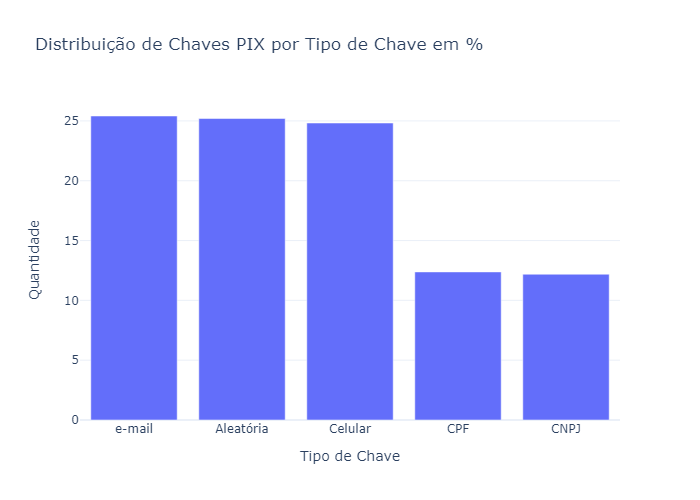

In [12]:
distribuicao_tipo_chave = df['TipoChave'].value_counts(normalize=True)*100

# Converter a série para um DataFrame para facilitar a plotagem
distribuicao_tipo_chave_df = distribuicao_tipo_chave.reset_index()
distribuicao_tipo_chave_df.columns = ['TipoChave', 'Count']

# Criar o gráfico de barras
fig = px.bar(distribuicao_tipo_chave_df, x='TipoChave', y='Count', 
             title='Distribuição de Chaves PIX por Tipo de Chave em %',
             labels={'TipoChave': 'Tipo de Chave', 'Count': 'Quantidade'},
             template='plotly_white')

# Exibir o gráfico
fig.show()

Percebe-se que o CPF e CNPJ tem menos cadastros de chaver pix, talvez seja explicado por questões de segurança dos dados pessoais e da empresa

### Quantidade total de chaves cadastrada por instituição

In [13]:
chaves_por_instituicao = df.groupby('Nome')['qtdChaves'].sum().reset_index()


# Ordenar do maior para o menor
chaves_por_instituicao = chaves_por_instituicao.sort_values(by='qtdChaves', ascending=False)

chaves_por_instituicao

,Nome,qtdChaves
720,NU PAGAMENTOS - IP,2205834041
95,CAIXA ECONOMICA FEDERAL,1877791867
742,PICPAY,941487817
41,BCO BRADESCO S.A.,848242701
731,PAGSEGURO INTERNET IP S.A.,603134292
...,...,...
752,RAS SERVIÇOS DIGITAIS LTDA.,3
694,IPC ADMINISTRACAO,3
845,VIATECH,1
744,PINPAG,1


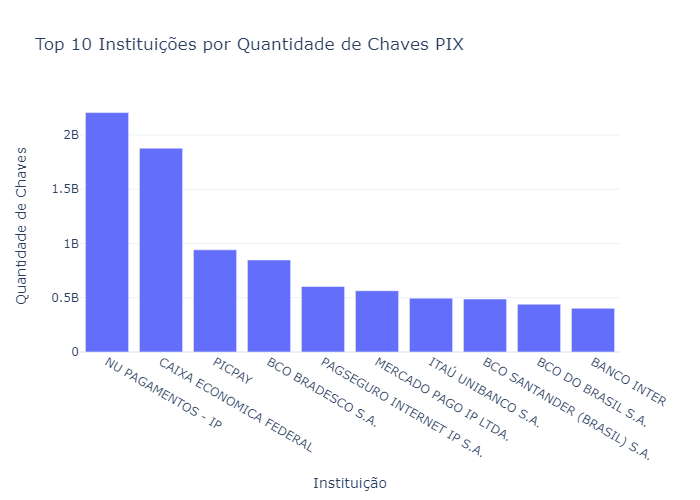

In [14]:
top_10_instituicoes = chaves_por_instituicao.head(10)

fig = px.bar(top_10_instituicoes, x='Nome', y='qtdChaves', 
             title='Top 10 Instituições por Quantidade de Chaves PIX',
             labels={'Nome': 'Instituição', 'qtdChaves': 'Quantidade de Chaves'},
             template='plotly_white')
fig.show()


Aqui já percebe-se que a nu_pagamentos, destaca-se em quantidade de chaves cadastrada  isso pode ser devido a sua popularidade ou até mesmo campanha de marketing, mas tem que ser verificados

### Qual total de chaves por tipo e instituição

In [15]:
# Agrupar pelos valores da coluna 'Nome' e 'TipoChave' e somar a quantidade de chaves
total_chaves_por_tipo = df.groupby(['Nome', 'TipoChave'])['qtdChaves'].sum().reset_index()
# Pivotar a tabela para ter os tipos de chave como colunas
total_chaves_por_tipo = total_chaves_por_tipo.pivot_table(index='Nome', columns='TipoChave', values='qtdChaves', aggfunc='sum').reset_index()
# Preencher valores NaN com 0 (caso não haja ocorrências de algum tipo de chave para uma instituição)
total_chaves_por_tipo = total_chaves_por_tipo.fillna(0)

# Adicionar uma coluna "Total" com a soma das chaves PIX para cada instituição
total_chaves_por_tipo['Total'] = total_chaves_por_tipo.sum(axis=1)

# Ordenar o DataFrame pelo total de chaves PIX de forma decrescente
total_chaves_por_tipo = total_chaves_por_tipo.sort_values(by='Total', ascending=False)

# Exibir o resultado

total_chaves_por_tipo


C:\Users\vanio\AppData\Local\Temp\ipykernel_5084\1123169283.py:9: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



TipoChave,Nome,Aleatória,CNPJ,CPF,Celular,e-mail,Total
720,NU PAGAMENTOS - IP,847752864.0,28324508.0,392373698.0,507757868.0,429625103.0,2.205834e+09
95,CAIXA ECONOMICA FEDERAL,781611449.0,8800410.0,541290208.0,345229300.0,200860500.0,1.877792e+09
742,PICPAY,627057860.0,320041.0,85836518.0,117633043.0,110640355.0,9.414878e+08
41,BCO BRADESCO S.A.,308284917.0,16917680.0,211873006.0,183419240.0,127747858.0,8.482427e+08
731,PAGSEGURO INTERNET IP S.A.,366892961.0,8685597.0,47657952.0,93215746.0,86682036.0,6.031343e+08
...,...,...,...,...,...,...,...
752,RAS SERVIÇOS DIGITAIS LTDA.,0.0,0.0,0.0,0.0,3.0,3.000000e+00
694,IPC ADMINISTRACAO,3.0,0.0,0.0,0.0,0.0,3.000000e+00
845,VIATECH,1.0,0.0,0.0,0.0,0.0,1.000000e+00
744,PINPAG,1.0,0.0,0.0,0.0,0.0,1.000000e+00


Aqui existe uma variação por tipo de cadastro, que deve ser observado posterirmente

### Quais são os picos e quedas no registro de chaves PIX por dia?

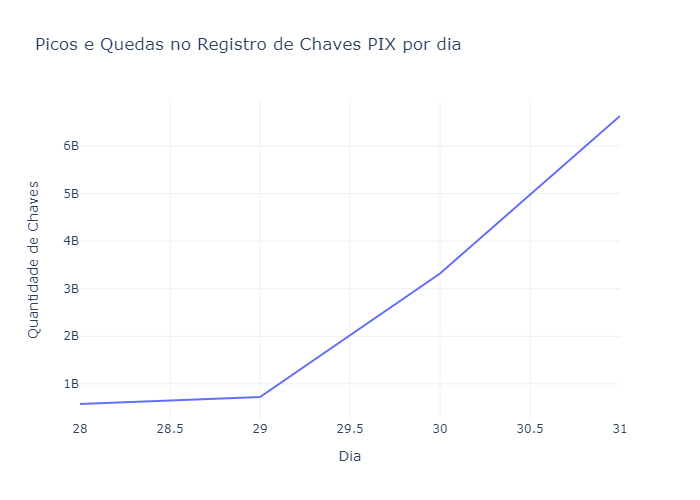

In [16]:
# Agrupar os dados por data e somar a quantidade de chaves
chaves_por_data = df.groupby('Dia')['qtdChaves'].sum().reset_index()

# Criar o gráfico de linha para visualizar os registros ao longo do tempo
fig = px.line(chaves_por_data, 
              x='Dia', 
              y='qtdChaves', 
              title='Picos e Quedas no Registro de Chaves PIX por dia',
              labels={'Data': 'Data', 'qtdChaves': 'Quantidade de Chaves'},
              template='plotly_white')

# Exibir o gráfico
fig.show()

 Os cadastros ocorreram sempre no final do mês a partir do dia 28 e  houve um pico de aumento de chaves cadastradas que se prolongou a partir do dia 29 , isso pode ser resultado de datas de pagamentos de proventos 

### Quais são os picos e quedas no registro de chaves PIX por dia?

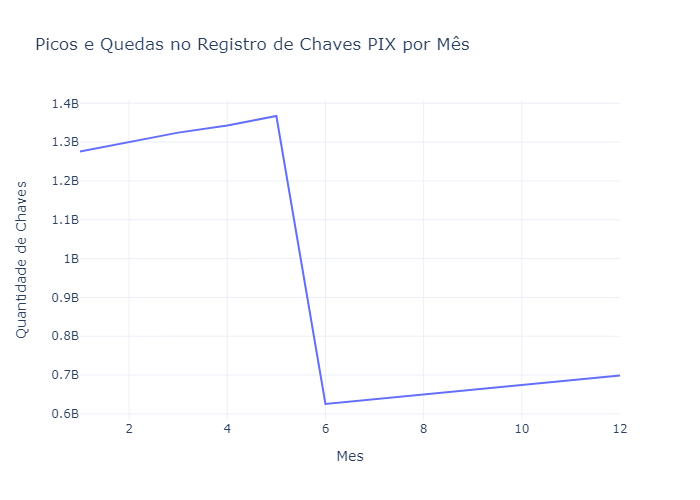

In [17]:
# Agrupar os dados por data e somar a quantidade de chaves
chaves_por_data = df.groupby('Mes')['qtdChaves'].sum().reset_index()

# Criar o gráfico de linha para visualizar os registros ao longo do tempo
fig = px.line(chaves_por_data, 
              x='Mes', 
              y='qtdChaves', 
              title='Picos e Quedas no Registro de Chaves PIX por Mês',
              labels={'Data': 'Data', 'qtdChaves': 'Quantidade de Chaves'},
              template='plotly_white')

# Exibir o gráfico
fig.show()

O primeiro semestre são os periodos de maior chaves cadastradas, isso requer uma investigação pois pode ser por influência economica, existe essa sazonalidade no mês 2 ao 5  

### Soma de chaves cadastradas por natureza por instituição

In [18]:
chaves_por_natureza = df.groupby('NaturezaUsuario')['qtdChaves'].sum().reset_index()

# Calcular o total de chaves
total_chaves = chaves_por_natureza['qtdChaves'].sum()

# Adicionar uma coluna com o percentual de cada categoria
chaves_por_natureza['Percentual'] = (chaves_por_natureza['qtdChaves'] / total_chaves) * 100

# Exibir o resultado
chaves_por_natureza

,NaturezaUsuario,qtdChaves,Percentual
0,PF,10709208056,95.215444
1,PJ,538135500,4.784556


A maioria das chaves cadastradas são de pessoas físicas, isso pode ocorrer pela gratuidade do cadastramento e da quantidade de usuários

### Top 50 em cadastramento de chaves por natureza 

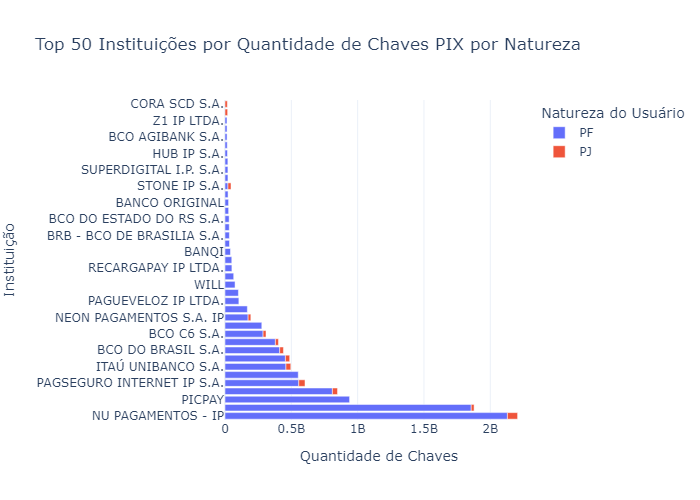

In [19]:
### Soma das 50 maiores instituição com  chaves cadastradas  e por natureza por instituição
chaves_por_natureza_agr = df.groupby(['Nome', 'NaturezaUsuario'])['qtdChaves'].sum().reset_index()
chaves_por_natureza_agr=chaves_por_natureza_agr.sort_values(by='qtdChaves', ascending= False)
chaves_por_natureza_agr_50=chaves_por_natureza_agr.head(50)
chaves_por_natureza_agr_50
fig = px.bar(chaves_por_natureza_agr_50, x='qtdChaves', y='Nome', 
             color='NaturezaUsuario',  # Adicionar a natureza do usuário como cor
             title='Top 50 Instituições por Quantidade de Chaves PIX por Natureza',
             labels={'Nome': 'Instituição', 'qtdChaves': 'Quantidade de Chaves', 'NaturezaUsuario': 'Natureza do Usuário'},
             template='plotly_white',  orientation='h'
        )

fig.show()

Aqui se confirma que a maioria das chaves são realmente de pessoas físicas com destaque a nubank , Picpay e pagseguro com maior cadastramentos

## Conclusão dos Insights

- Periodo analisado de 1 ano e 4 meses temos com tipos de chaves cadastrados: e-mail 25.411553%, Aleatória 25.201097% e Celular 24.823692%, essas preferências pode ser atrelado a questão da segurança das informações pessoais, haja visto que maioria dos cadastros são de pessoas fisicas com 95% das chaves cadastradas.  

- Aqui já percebe-se que a NU_PAGAMENTOS,CAIXA ECONOMICA E PICPAY, destaca-se em quantidade de chaves cadastrada isso pode ser devido a sua popularidade ou até mesmo campanha de marketing, mas tem que ser verificados

- O primeiro semestre são os periodos com maior chaves cadastradas, isso requer uma investigação pois pode ser por influência economica, existe aumento no mês 1 ao 5  e queda a partir de junho, existe uma sazonalidade de queda a partir de junho.

-  Os cadastros ocorreram sempre no final do mês a partir do dia 28 e  houve um pico de aumento de chaves cadastradas que se prolongou a partir do dia 29 , isso pode ser resultado de datas de pagamentos de proventos 

- 




# Considerações Finais

- Email, chaves aleatórias e celular, são chaves preferenciais dos usuários
- 95% dos usuários do Pix são pessoas físicas
- Faz seus cadastro no final do Mês e no primeiro semestre
- Nu_pagamentos,Caixa economica ,Picpay e Pagseguro são os líderes em chaves cadastradas


# Trabalhos futuros
- Estudo Longitudinal da Adoção: Realizar um estudo longitudinal para observar como a adoção do PIX evolui ao longo do tempo. Isso pode incluir análises detalhadas de como diferentes grupos demográficos (por idade, região, etc.) estão adotando o PIX.

- Engajamento do Usuário: Analisar o engajamento dos usuários com o PIX, como frequência de uso, valores médios transacionados, e tipos de transações mais comuns. Isso pode ajudar a identificar padrões de comportamento e oportunidades para aumentar o engajamento.

- Impacto nas Micro e Pequenas Empresas: Estudar como o PIX está impactando micro e pequenas empresas em termos de facilidade de recebimento de pagamentos, fluxo de caixa e custos operacionais.

- Análise de Fraudes e Segurança: Realizar uma análise detalhada dos incidentes de fraude e segurança relacionados ao PIX. Isso pode ajudar a identificar vulnerabilidades e desenvolver estratégias para mitigar riscos.